在之前（linear_model.ipynb）中，我们都是人工构建loss函数以及grad函数和update函数，实际上Pytorch已经有一套成熟的函数供我们调用。

在使用之前，我们需要明确我们每次训练数据的流程。

1.prepare dataset<br>
2.Design model using class<br>
3.Construct loss and optimizer<br>
4.Trainging cycle<br>

1.如下的方法为mini-batch的数据集风格，但是由于只有三组数据，所以就直接写成 3 $\times$ 1 的矩阵形式<br>
并且这里的x和y都应该是tensor，而不是scaler或者其他形式

In [35]:
import torch

x_data = torch.tensor([[1.0],[2.0],[3.0]])
y_data = torch.tensor([[2.0],[4.0],[6.0]])

2.构建函数<br>

在PyTorch中，我们不需要手工的计算导数，重要的是通过Tensor之间的计算直接狗仔计算图。<br>
这其中的关键就是确定w和b的大小。而确定w和b的维度又要知道x（input）和y_pred（output）的维度。<br>
如下为定义model的标注格式，以后都按照这种方法定义。


In [36]:
class LinearModul(torch.nn.Module):
    #构建函数
    def __init__(self):
        #父类，不用管，just do it
        super(LinearModul,self).__init__()
        #定义了一个线性层，作为class的实例变量，这样每个实例都有自己独立的线性层。
        #括号中的两个1分别表示输入feature的数量和输出feature的数量。
        #Linear函数默认计算y=wx+b
        self.linear = torch.nn.Linear(1,1)

    def forward(self,x):
        #在 forward 方法中，通过 self 访问实例变量 linear，并对输入 x 进行计算。
        #相当于计算y_pred=wx+b
        y_pred = self.linear(x)
        return y_pred
model = LinearModul()


3. Constuct Loss and Optimizer

接下来就要构建Loss function和优化函数了。<br>
这里我们使用的是MSEloss函数，直接调用即可。<br>
优化函数有很多，这里先用SGD<br>
优化器：<br>
*torch.optim.Adagrad<br>
*torch.optim.Adam<br>
*torch.optim.Adamax<br>
*torch.optim.ASGD<br>
*torch.optim.LBFGS<br>
*torch.optim.RMSprop<br>
*torch.optim.Rprop<br>
*torch.optim.SGD<br>

In [37]:
#不计算均值
criterion = torch.nn.MSELoss(size_average=False)
#检查model所有成员，权重加入优化训练，learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

4. Training cycle

通常的顺序为：
*y_pred
*loss
*clear
*backward
*update

In [38]:
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    print(epoch,loss.item())
    
    #clear
    optimizer.zero_grad()
    #backward
    loss.backward()
    #update
    optimizer.step()


0 25.33168601989746
1 11.330266952514648
2 5.096464157104492
3 2.3205947875976562
4 1.084114670753479
5 0.5329339504241943
6 0.2868409752845764
7 0.17657487094402313
8 0.12678492069244385
9 0.10392744094133377
10 0.09306921064853668
11 0.08756319433450699
12 0.08444900810718536
13 0.08240915089845657
14 0.08085689693689346
15 0.07953108847141266
16 0.078315369784832
17 0.07715742290019989
18 0.07603418081998825
19 0.0749349370598793
20 0.07385510951280594
21 0.07279244065284729
22 0.07174575328826904
23 0.07071435451507568
24 0.06969801336526871
25 0.06869623810052872
26 0.06770887970924377
27 0.0667358934879303
28 0.06577686220407486
29 0.06483142077922821
30 0.06389980018138885
31 0.06298140436410904
32 0.062076229602098465
33 0.061184175312519073
34 0.060304827988147736
35 0.05943821370601654
36 0.05858383700251579
37 0.05774199962615967
38 0.05691216513514519
39 0.05609416216611862
40 0.05528804287314415
41 0.05449353903532028
42 0.05371019244194031
43 0.05293842405080795
44 0.0521

接下来让我们尝试运行如上所示的所有代码。

w=  1.9509913921356201
b=  0.11140791326761246
Predict(after training) epoch= 100 when x = 4, y_pred= tensor([7.9154], grad_fn=<ViewBackward0>)


<function matplotlib.pyplot.show(close=None, block=None)>

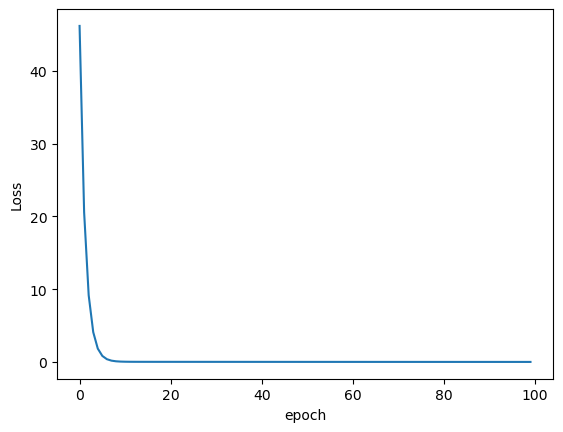

In [39]:
import torch
import matplotlib.pyplot as plt

x_data = torch.tensor([[1.0],[2.0],[3.0]])
y_data = torch.tensor([[2.0],[4.0],[6.0]])

class LinearModul(torch.nn.Module):
    def __init__(self):
        super(LinearModul,self).__init__()
        self.linear = torch.nn.Linear(1,1)

    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred
model = LinearModul()

criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

loss_value = []

for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    loss_value.append(loss.item())
    #print(epoch,loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#Output weight and bias
print('w= ' ,model.linear.weight.item())
print('b= ', model.linear.bias.item())

#Test model
x_test = torch.tensor([4.0])
y_test = model(x_test)
print('Predict(after training)','epoch=',epoch+1,'when x = 4, y_pred=',y_test)

plt.plot(range(100),loss_value)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show

在如上的训练中，我们使用的是一个SGD的优化器，但是实际上PyTorch支持非常多不同的优化器，为了比较不同的优化器对training的影响，我们可以由如下代码进行实现：

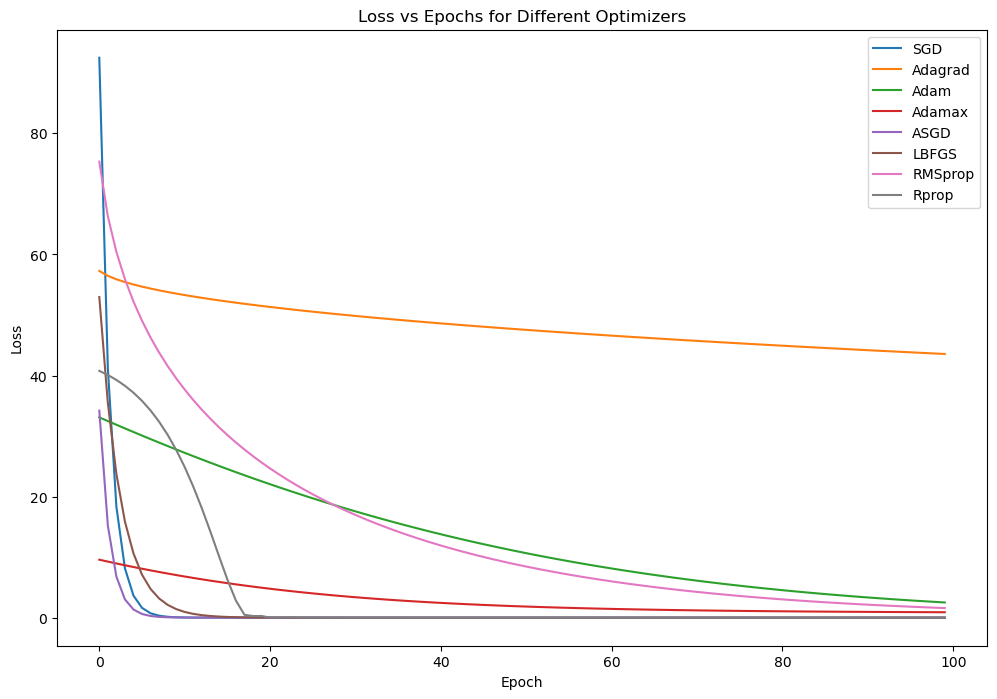

In [40]:
import torch
import matplotlib.pyplot as plt

# 初始化训练数据
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])

# 定义线性模型类
class LinearModul(torch.nn.Module):
    def __init__(self):
        super(LinearModul, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # 定义一个线性层，输入和输出都是1维

    def forward(self, x):
        y_pred = self.linear(x)  # 前向传播，计算预测值
        return y_pred

# 定义一个训练模型的函数
def train_model(optimizer_type, lr=0.01, epochs=100):
    model = LinearModul()  # 初始化模型
    criterion = torch.nn.MSELoss(size_average=False)  # 定义损失函数，均方误差
    optimizer = optimizer_type(model.parameters(), lr=lr)  # 初始化优化器
    loss_value = []  # 存储每个epoch的损失值

    # 训练循环
    for epoch in range(epochs):
        y_pred = model(x_data)  # 前向传播，计算预测值
        loss = criterion(y_pred, y_data)  # 计算损失值
        loss_value.append(loss.item())  # 记录损失值

        optimizer.zero_grad()  # 梯度清零
        loss.backward()  # 反向传播，计算梯度
        optimizer.step()  # 更新参数

    return loss_value  # 返回每个epoch的损失值

# 定义不同的优化器字典
optimizers = {
    'SGD': torch.optim.SGD,
    'Adagrad': torch.optim.Adagrad,
    'Adam': torch.optim.Adam,
    'Adamax': torch.optim.Adamax,
    'ASGD': torch.optim.ASGD,
    'LBFGS': torch.optim.LBFGS,
    'RMSprop': torch.optim.RMSprop,
    'Rprop': torch.optim.Rprop
}

# 初始化绘图
plt.figure(figsize=(12, 8))

# 遍历每个优化器
for name, optim in optimizers.items():
    # name 是优化器的名称，例如 'SGD'
    # optim 是优化器的类，例如 torch.optim.SGD
    if name == 'LBFGS':  # 对于LBFGS优化器需要特殊处理,需要先清零。
        #closure 函数的主要作用是确保在每次优化器更新之前正确计算损失和梯度。LBFGS优化器在每次更新参数时，可能需要多次调用 closure 函数，以便进行充分的评估和调整。
        def closure():
            optimizer.zero_grad()  # 梯度清零
            y_pred = model(x_data)  # 前向传播，计算预测值
            loss = criterion(y_pred, y_data)  # 计算损失值
            loss.backward()  # 反向传播，计算梯度
            return loss
        model = LinearModul()  # 初始化模型
        criterion = torch.nn.MSELoss(size_average=False)  # 定义损失函数，均方误差
        optimizer = optim(model.parameters(), lr=0.01)  # 初始化LBFGS优化器
        loss_value = []

        for epoch in range(100):
            optimizer.step(closure)  # 使用closure更新参数
            #在每个epoch开始时，调用 optimizer.step(closure)。这个调用会多次执行 closure 函数（根据LBFGS的内部逻辑），以确保在当前epoch中找到合适的参数更新。
            #closure 函数执行前向传播、损失计算和反向传播，并返回损失值。
            #optimizer.step 完成参数更新后，再次执行前向传播和损失计算，这是为了记录当前epoch的损失值。
            y_pred = model(x_data)  # 前向传播，计算预测值
            loss = criterion(y_pred, y_data)  # 计算损失值
            loss_value.append(loss.item())  # 记录损失值
    else:
        loss_value = train_model(optim)  # 对于其他优化器，直接调用train_model函数

    plt.plot(range(100), loss_value, label=name)  # 绘制损失值随epoch变化的曲线

# 设置图形标签和标题
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs for Different Optimizers')
plt.show()  # 显示图形

